In [1]:
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt

In [2]:
# A nice way to immediately make your plots look sexy: 
plt.style.use('ggplot')

You can check what the other options are by looking at `plt.style.available`

## The Statistical Inference Problem

The setup of a Statistical Inference Problem consists of the following components:

- A data space $\mathcal{Y} \subset \mathbb{R}^{d_y}$
- A parameter space $\mathcal{\Theta} \subset \mathbb{R}^{d_\theta}$

- A parametric model: this is essentially a probability kernel from one space to another: $p(y|\theta)\rho(dy)$, where $\rho$ is a given $\sigma$-finite dominating measure. In practice, this is the Lebesgue measure (continuous), counting measure (discrete), or a product measure on the space.

The parametric model can either be expressed in the form of its density, or in the form $y=f_\theta(\epsilon)$, where $\epsilon$ is an independent random variable.

Given this setup, there are 2 approaches to statistical inference: Bayesian, and Frequentist.

For the Frequentist approach, we define the likelihood function: 

$L(\theta) = p(y|\theta)$, and we aim to maximise this function. Thus, the problem of inference essentially becomes an optimisation problem. 

For the Bayesian approach, we use the language of probability to assert our beliefs of the value of the parameter $\theta$: we assign a prior distribution $\nu(d\theta)$ to the parameter, then by Bayes' formula, the posterior distribution is given by:

$\frac{p(y|\theta)}{p(y)}\nu(d \theta)$

The posterior distribution is a probability measure on the parameter space $\Theta$. It is integrals with respect to this probaility measure that are the quantity of interest.

The linear model is a very intersting model to discuss from a statistical perspective. This is because many of the quantities that it is not possible to evaluate, can now be evaluated:

We let:

$\epsilon_i \overset{i.i.d}{\sim} \mathcal{N}(0, \sigma_\epsilon^2)$ 
$y_i = f_\theta(x_i) + \epsilon_i$



### Data generation

In [3]:
d_y = 100; d_t = 3; sigma_eps = 0.3

X = stats.norm.rvs(size=(d_y, d_t))
theta = np.arange(1, 1+d_t, dtype=np.float64).reshape(d_t, 1)
y = X @ theta + stats.norm.rvs(scale=sigma_eps, size=(d_y, d_t))

### Model Fitting

In [5]:
lr = LinearRegression()
lr.fit(X, y)
x_t = np.linspace(-3, 3).reshape(-1, 1)
# y_t = lr.predict(x_t)

### Model output

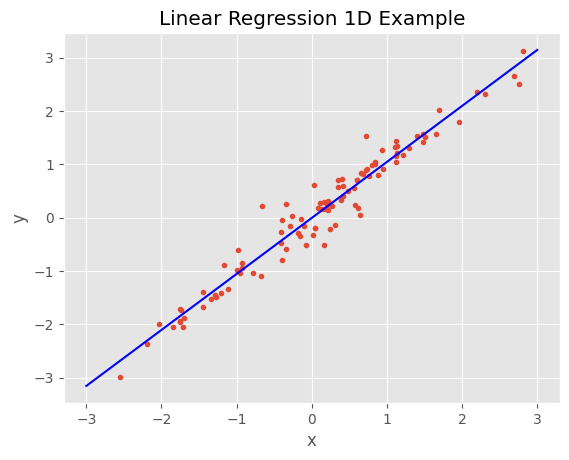

In [7]:
fig, ax = plt.subplots()
ax.plot(X, y, 'o', markersize=3.)
ax.plot(x_t, y_t, c='b')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Linear Regression 1D Example')
plt.show()

We now seek to evaluate the performance of our estimator, $\theta$, in terms of risk. 

In this case, the estimator $\hat{\theta}=(X^TX)^{-1}X^Ty$ has known distribution:

$\hat{\theta} \sim \mathcal{N}(\theta, (X^T X)^{-1})$

Thus, the risk function $R(\theta, \hat{\theta})$ can be evaluated analytically, and is given by:

$R(\theta, \hat{\theta}) = Tr((X^T X)^{-1})$

In [10]:
np.sum(1/np.linalg.eig(X.T @ X)[0])

0.02900068987558261

Now, let's introduce some regularisation: we now instead, have the estimator:
$\hat{\theta}_R=(X^T X + \frac{1}{\sigma^2} I_{d_\theta})^{-1}X^Ty$

For this estimator, again the distribution of the estimator is known analytically, and is given by:

$\hat{\theta}_R \sim \mathcal{N}((X^T X + \frac{1}{\sigma^2} I_{d_\theta})^{-1}X^T X \theta, (X^T X + \frac{1}{\sigma^2} I_{d_\theta})^{-1}X^T X (X^T X + \frac{1}{\sigma^2} I_{d_\theta})^{-1})$